[0, 6.03, 11.71, 17.085, 22.05, 26.745, 31.515, 36.07, 40.18, 44.405, 48.51, 52.45, 56.08, 59.455, 62.925, 66.54, 69.755, 73.115, 76.395, 79.63, 82.88, 86.085, 88.94, 91.735, 94.82, 97.74, 100.605, 103.29, 105.955, 108.73, 111.215, 113.89, 116.515, 118.945, 121.35, 123.79, 126.13, 128.645, 130.92, 133.09, 135.595, 137.995, 140.195, 142.58, 144.615, 146.745, 148.78, 151.06, 153.11, 155.06, 157.025, 158.975, 160.865, 162.9, 164.84, 166.925, 168.935, 170.635, 172.415, 174.2, 176.06, 177.82, 179.515, 181.275, 182.735, 184.295, 186.04, 187.57, 189.14, 190.655, 192.21, 193.89, 195.41, 196.865, 198.58, 200.04, 201.475, 203.16, 204.64, 206.205, 207.69, 209.1, 210.575, 212.06, 213.5, 214.78, 216.185, 217.43, 218.825, 220.335, 221.72, 222.985, 224.21, 225.385, 226.66, 227.68, 229.045, 230.18, 231.235, 232.36, 233.525, 234.74, 236.09, 237.315, 238.56, 239.685, 240.81, 241.905, 242.945, 244.07, 245.18, 246.445, 247.69, 248.795, 249.885, 251.04, 252.175, 253.115, 254.26, 255.21, 256.19, 257.295, 25

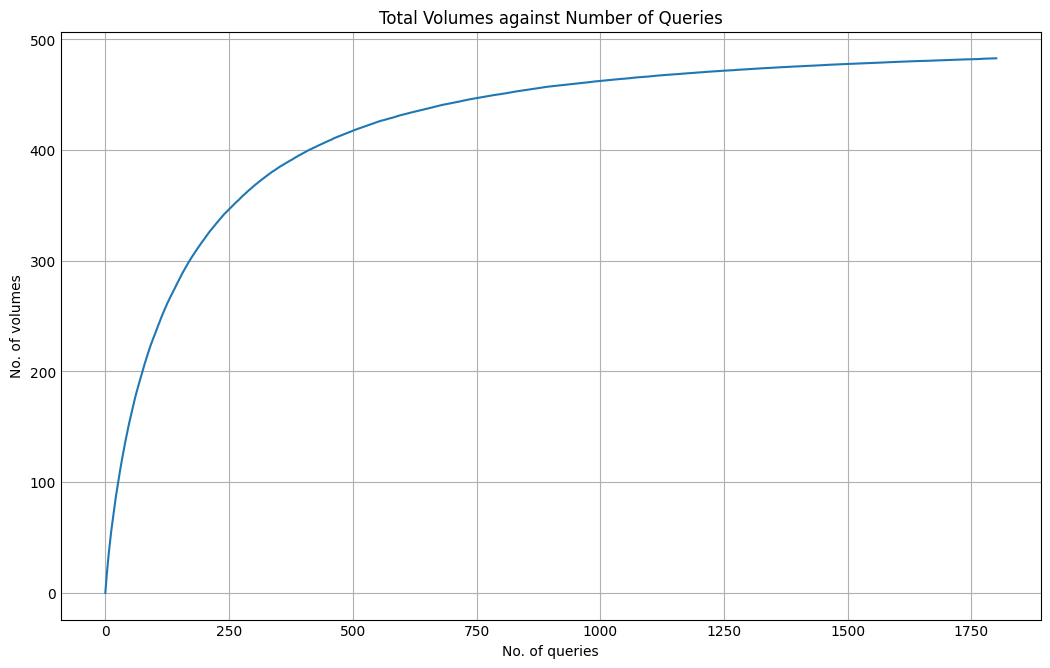

In [ ]:
import math 
import random 
import matplotlib.pyplot as plt 



def query_gen():
    query_range_list = []
    for i in range (RSEmax):
        for j in range (i+1):
            query_range_list.append(j)
    no_range = random.choice(query_range_list)

    first_int = random(1, RSEmax-no_range+1)
    query = (first_int, first_int+1)
    return(query)



def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(int(math.log(RSEmax, 2)+1)):
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i+1) !=  1:
                break
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return(query_list)





RSEmax = 256
max_volumes = int(RSEmax*2 - 1)
no_of_runs = 200
no_of_queries = 1800
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            while query_asked in query_tracker:
                query_asked = query_gen()
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()



